Very Good-Excellent	740-850		DTI	good <= 36%		Age of oldest account	good >7 years
Fair-Good	580-669			bad >43			bad <7 years
Poor	300-579						

In [2]:
!pip install graphviz
import graphviz

  Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.linear_model import LogisticRegression

In [29]:
cc = pd.read_csv("CS.csv", index_col = 0)
pr = pd.read_csv("PR.csv", index_col = 0)

In [30]:
cc.head()
cc.columns = ["Score", "Account_Age", "DTI", "Label"]
cc

,Score,Account_Age,DTI,Label
UserID,,,,
1,740,8,30,Yes
2,750,10,44,Yes
3,760,3,15,Yes
4,770,8,46,Yes
5,780,16,29,Yes
6,790,5,35,Yes
7,800,13,15,Yes
8,850,6,45,Yes
9,845,4,10,Yes


In [31]:
pr.head()

,Tent,Sleeping Bag,Dog food,Dog Treats,Label
UserID,,,,,
1,1,0,1,1,Tennis Ball
2,1,0,1,0,Tennis Ball
3,0,1,1,1,Tennis Ball
4,0,0,1,1,Tennis Ball
5,1,0,1,1,Tennis Ball


In [32]:
#Make a pretty confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    

In [34]:
quantitative_columns = ["Score", "Account_Age", "DTI"]
target_column = 'Label' 



le = LabelEncoder()
cc["Encoded"] = le.fit_transform(cc[target_column])
cc

,Score,Account_Age,DTI,Label,Encoded
UserID,,,,,
1,740,8,30,Yes,1
2,750,10,44,Yes,1
3,760,3,15,Yes,1
4,770,8,46,Yes,1
5,780,16,29,Yes,1
6,790,5,35,Yes,1
7,800,13,15,Yes,1
8,850,6,45,Yes,1
9,845,4,10,Yes,1


In [35]:
X = cc.iloc[:, :-2] 
y = cc[["Encoded"]]

In [36]:
X

,Score,Account_Age,DTI
UserID,,,
1,740,8,30
2,750,10,44
3,760,3,15
4,770,8,46
5,780,16,29
6,790,5,35
7,800,13,15
8,850,6,45
9,845,4,10


In [37]:
y

,Encoded
UserID,
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [39]:
label_mapping = dict(enumerate(le.classes_))
print("\nLabel Mapping:")
print(label_mapping)


Label Mapping:
{0: 'No', 1: 'Yes'}


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
X_train

,Score,Account_Age,DTI
UserID,,,
1,740,8,30
5,780,16,29
17,400,25,40
6,790,5,35
14,842,20,36
12,741,30,30
23,460,3,45
2,750,10,44
3,760,3,15


In [46]:
X_test

,Score,Account_Age,DTI
UserID,,,
28,600,5,21
16,300,7,30
24,360,15,29
18,500,5,38
9,845,4,10
10,745,8,35
29,650,10,50
25,380,2,15
13,742,5,35


In [47]:
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Confusion Matrix:
 [[6 0]
 [0 3]]


In [49]:
class_names = ["Yes", "No"] #[0,1,2]
class_names



['Yes', 'No']

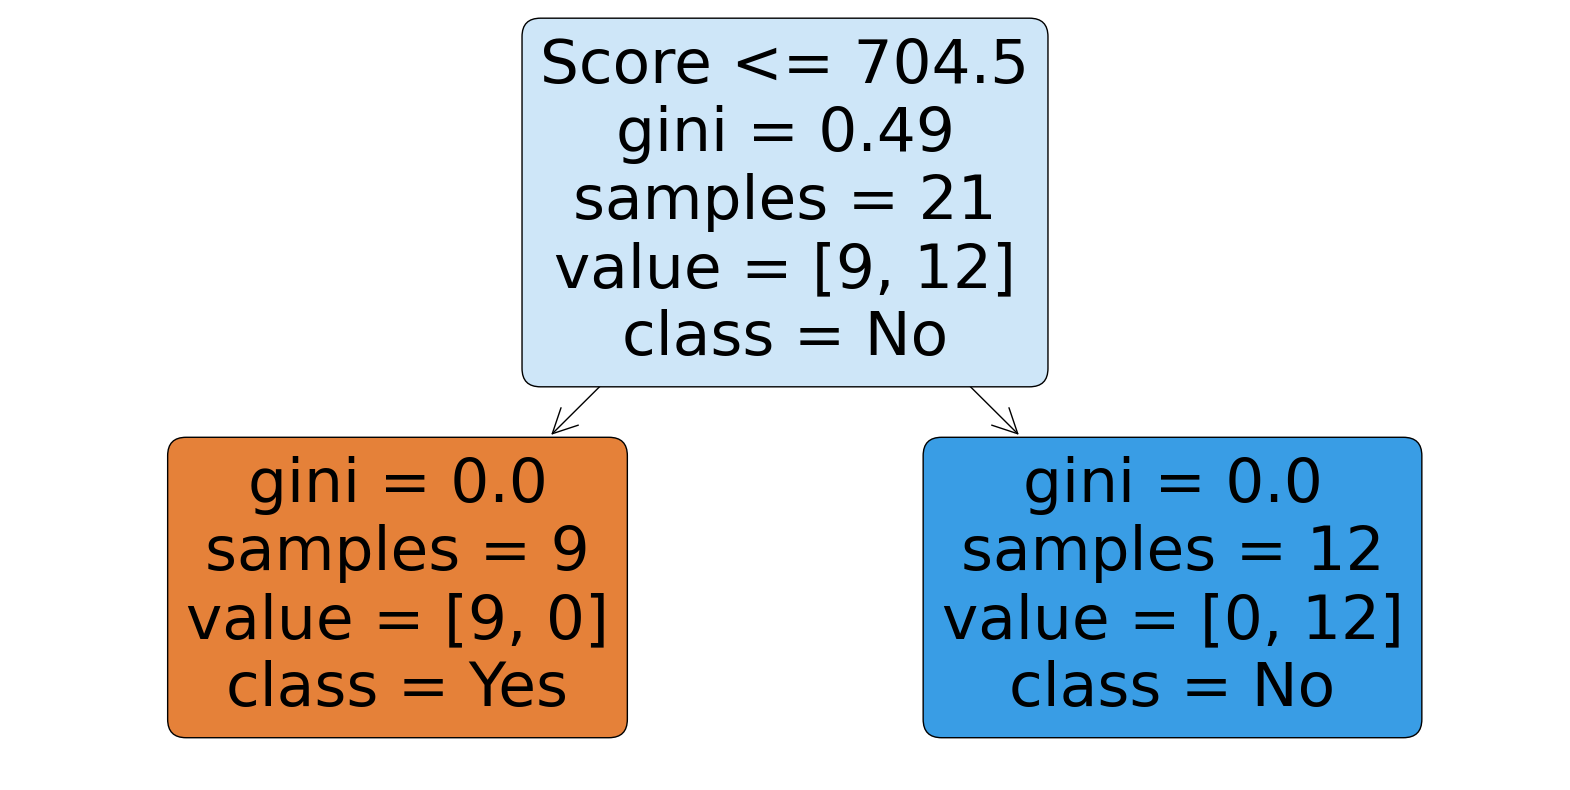

In [50]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.show()


The confusion matrix is:
[[6 0]
 [0 3]]


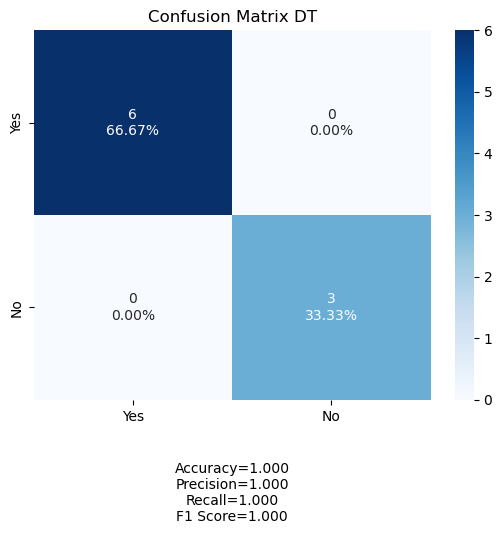

In [57]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["Yes", "No"]

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix DT",
                     xyplotlabels=False)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9


The confusion matrix is:
[[6 0]
 [0 3]]


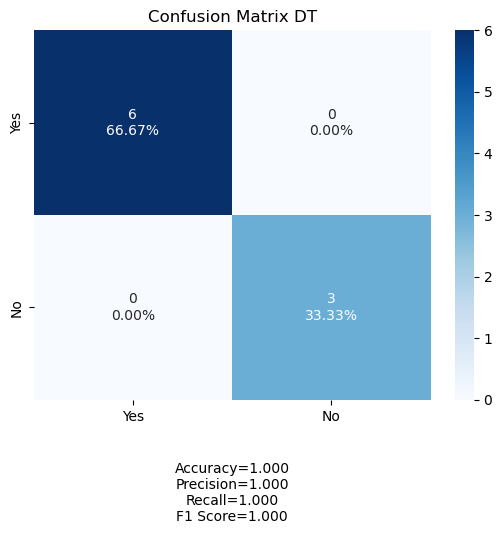

In [60]:
dt_model = DecisionTreeClassifier(
                            criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=4, 
                            min_samples_split=10, 
                            min_samples_leaf=2, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.01,
                            #min_impurity_split=None, 
                            class_weight=None,
                            )

# Train the model
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["Yes", "No"]

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix DT",
                     xyplotlabels=False)

In [67]:
pr

,Tent,Sleeping Bag,Dog food,Dog Treats,Label
UserID,,,,,
1,1,0,1,1,Tennis Ball
2,1,0,1,0,Tennis Ball
3,0,1,1,1,Tennis Ball
4,0,0,1,1,Tennis Ball
5,1,0,1,1,Tennis Ball
6,1,0,1,0,Tennis Ball
7,0,0,1,1,Tennis Ball
8,0,1,1,0,Tennis Ball
9,0,1,1,0,Tennis Ball


In [68]:
target_column = 'Label' 



le = LabelEncoder()
pr["Encoded"] = le.fit_transform(pr[target_column])
pr

,Tent,Sleeping Bag,Dog food,Dog Treats,Label,Encoded
UserID,,,,,,
1,1,0,1,1,Tennis Ball,1
2,1,0,1,0,Tennis Ball,1
3,0,1,1,1,Tennis Ball,1
4,0,0,1,1,Tennis Ball,1
5,1,0,1,1,Tennis Ball,1
6,1,0,1,0,Tennis Ball,1
7,0,0,1,1,Tennis Ball,1
8,0,1,1,0,Tennis Ball,1
9,0,1,1,0,Tennis Ball,1


In [69]:
X = pr.iloc[:, :-2] 
y = pr[["Encoded"]]

In [70]:
X

,Tent,Sleeping Bag,Dog food,Dog Treats
UserID,,,,
1,1,0,1,1
2,1,0,1,0
3,0,1,1,1
4,0,0,1,1
5,1,0,1,1
6,1,0,1,0
7,0,0,1,1
8,0,1,1,0
9,0,1,1,0


In [71]:
y

,Encoded
UserID,
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [72]:
label_mapping = dict(enumerate(le.classes_))
print("\nLabel Mapping:")
print(label_mapping)


Label Mapping:
{0: 'Camp Stove', 1: 'Tennis Ball'}


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
X_train

,Tent,Sleeping Bag,Dog food,Dog Treats
UserID,,,,
29,1,0,0,1
25,1,0,0,0
13,0,1,0,1
1,1,0,1,1
5,1,0,1,1
17,0,1,0,0
6,1,0,1,0
14,0,0,0,1
12,1,0,0,1


In [112]:
X_test

,Tent,Sleeping Bag,Dog food,Dog Treats
UserID,,,,
28,1,1,1,0
16,1,1,1,0
24,1,1,0,0
18,1,0,0,0
9,0,1,1,0
10,0,1,1,1


In [113]:
dt_model = DecisionTreeClassifier(
                            ccp_alpha = 0,                        
                            criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=42, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0,
                            #min_impurity_split=None, 
                            class_weight=None,
                            )

# Train the model
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6




The confusion matrix is:
[[4 0]
 [1 1]]


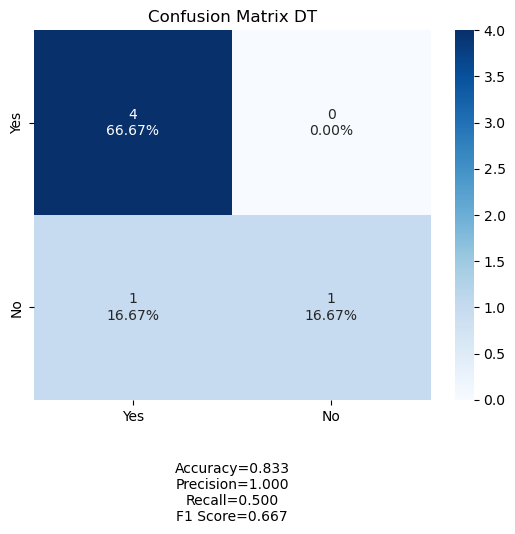

In [114]:

cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["Yes", "No"]

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix DT",
                     xyplotlabels=False)

In [115]:
class_names = ["Camp Stove", "Tennis Ball"]
class_names

['Camp Stove', 'Tennis Ball']

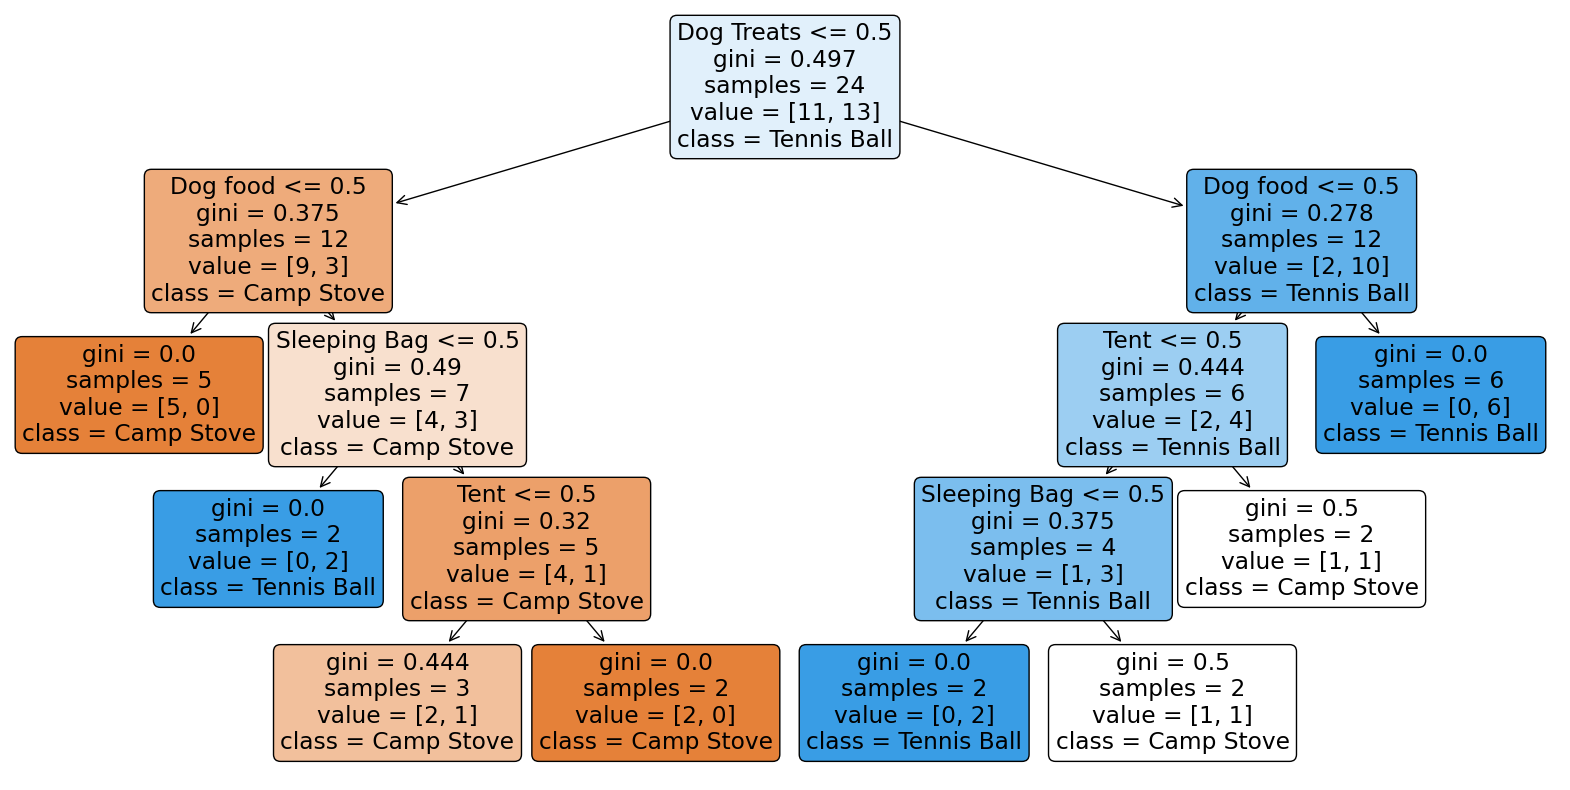

In [116]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.show()

In [117]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8333333333333334

Confusion Matrix:
 [[4 0]
 [1 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
coefficients = model.coef_[0]  # Coefficients for each feature
feature_names = X.columns  # Feature names

# Combine feature names with coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
        Feature  Coefficient
3    Dog Treats     1.276676
2      Dog food     0.990331
0          Tent    -0.408353
1  Sleeping Bag    -1.106833


In [119]:
probabilities = model.predict_proba(X_test)

# Create a DataFrame with predictions and probabilities
results = pd.DataFrame(probabilities, columns=['Probability_Class_0', 'Probability_Class_1'])
results['Prediction'] = y_pred
results['Actual'] = y_test.reset_index(drop=True)

print("\nPrediction Details:")
print(results)


Prediction Details:
   Probability_Class_0  Probability_Class_1  Prediction  Actual
0             0.688190             0.311810           0       0
1             0.688190             0.311810           0       0
2             0.855944             0.144056           0       0
3             0.662659             0.337341           0       0
4             0.594673             0.405327           0       1
5             0.290417             0.709583           1       1
